# Gumbel-Max Trick 
> Pre-requisite: Probability theory

The Gumbel-max trick is useful technique for sampling from a discrete distribution, especially when built-in statistical functions are unavailable. Although many statistical software packages can handle a wide range of distributions, there are situations where you need to sample from distributions that may not be explicitly supported.

In this blog, we will discuss the Gumbel-max trick, it's mathematical proof, and a provide simulation example. Before diving into the trick, let's do something easy first. We will briefly revist the inverse cumulative distribution function (CDF) method for smampling form a distribution, which applies to both continuous and discrete distributions. In contrast, the Gumbel-max trick is specifically applicable to the discrete distributions.

### Inverse CDF method
**Definition**: The CDF of a random variable $Z$ is given by $F_Z(z) = P(Z \leq z)~\forall~z$ where $P(\cdot)$ denotes the probability. The CDF is a non-decreasing function defined on the real line $\mathbb{R}$.<br>
**Definition**: For a non-decreasing function $F$ on $\mathbb{R}$, the generalized inverse is defined as $F^{-1}(u) = min\{z: F(z) \geq u\}, u \in \mathbb{R}$. For a continuous random variable the inequality "$\geq$" become equality "$=$".<br>
Suppose that we want to sample $Z \sim P(z)$, and we have access to inverse CDF of $Z$, then<br>
**Lemma**:<br>
If $U \sim \text{Uniform}(0, 1)$, then $Z = F_Z^{-1}(U)$ is a simulation from $P(z)$.<br>
***Proof***: Consider $P(Z \leq z) = P(F_Z^{-1}(U) \leq z) = P(U \leq F_Z(z)) = \int_{0}^{F_Z(z)} 1~\text{d}u =  F_Z(z)$. Hence, $Z$ follows the desired distribution $P(z)$.
We can observe that the inverse CDF method can be used to generate samples of $Z$ through the transformation of a uniform random variable where the transformation is the inverse CDF of $Z$ itself. For most of the statistical softwares it is easier to generate samples from a uniform distribution.

#### A Coding example
Suppose $Z$ is a categorical random variable that is $Z$ can take values from $\{1, 2, \dots, K\}$ with probabilities $P(Z=k)=p_k$ where $K$ denotes the categories. We would like to generate various realizations (samples) of $Z$ (e.g. $\{Z_1, Z_2, \cdots, Z_n\}$) from this distribution. 
We can employ the inverse CDF method. Please refer to the Python code example for more clarity, come back, and read again.<br>
 
### Gumbel-max trick
**Definition**: The Gumbel distribution of a random variable $X \in \mathbb{R}$ is given by $f_X(x) = \frac{1}{\beta}\exp(-(x - \mu) - \exp(-(x - \mu)/\beta))$, the CDF is $F_X(x) = P(X \leq x) = \exp(-\exp(-(x - \mu)/\beta))$, and the inverse CDF is $-\log(\log(x - \mu)/\beta)$. To the scope of this discussion, it is enough to consider $\mu=0, \beta=1$, that is $X \sim \text{Gumbel}(0, 1)$.<br>
The Gumbel-max trick converts the sampling problem into an optimization problem and the key result is as follows.<br>
\begin{align}
\tag{1}
I = \underset{k}{\text{argmax}}~(\log(p_k) + G_k) \sim \text{Categorical}(p_k), 1 \leq k \leq K
\end{align}
where $G_k \sim \text{Gumbel}(0, 1)$ are Gumbel-distributed i.i.d random variables, and $I\in \mathbb{Z}$ is a random variable because of $G_k$. Eq. (1) states that the index $I$ follows the desired categorical distribution (see proof), this index is obtained by adding samples from the Gumbel distribution (the Gumbel noise) to the log probabilities and choosing the index for which the quantity is maximum. <br>
***Proof***: Let $X_k = \log(p_k) + G_k \in \mathbb{R}$. If the solution of Eq. (1) is the index $k$, then the event $\{I = k\}$ is equivalent to the event $\{X_k > X_j~\forall j \neq k\}$ in the probability space. We can further translate it to another equivalent event "$\{\text{sum over all}~x~(X_k = x, X_j < x~\forall j \neq k)\}$". Please note that $G_k$'s are i.i.d and consequently $X_k$'s are also i.i.d.
Hence in probability space, we have<br>
\begin{align}
P(I = k) &= P(X_k > X_j~\forall k \neq j) = \int P(X_k = x, X_j < x~\forall j \neq k)~\mathrm{d}x \\ \nonumber
&=\int P(X_k = x) P(X_j < x~\forall~j \neq k|X_k = x)~\mathrm{d}x \\ \nonumber
&= \int P(X_k = x) P(X_j < x~\forall~j \neq k)~\mathrm{d}x =  \int P(X_k = x) \prod_{j \neq k} P(X_j < x)~\mathrm{d}x \\ \nonumber
&= \int P(G_k = x - log(p_k)) \prod_{j \neq k} P(G_j < x - \log(p_j))~\mathrm{d}x \\ \nonumber
&= \int \exp(\log(p_k) - x - \exp(\log(p_k) - x)) \prod_{j \neq k} \exp(-\exp(\log(p_j) - x))~\mathrm{d}x \\ \nonumber
&= \int \exp(\log(p_k))\exp(-x)\exp(-\exp(\log(p_k) - x))\prod_{j \neq k} \exp(-\exp(\log(p_j) - x))~\mathrm{d}x \\ \nonumber
&= \int p_k \exp(-x)\prod_{k} \exp(-\exp(\log(p_k) - x))~\mathrm{d}x \\ \nonumber
&= \int p_k \exp(-x) \prod_{k} \exp(-p_k\exp(-x)))~\mathrm{d}x \\ \nonumber
&= p_k \int \exp(-x) \exp(-\sum_{k} p_k \exp(-x)))~\mathrm{d}x \\ \nonumber
&= p_k \int_{-\infty}^{+\infty} \exp(-x) \exp(-1\exp(-x)))~\mathrm{d}x = p_k
\end{align}
This completes the proof. Hence the random variable $I \sim \text{Cat}(p_k)$. To generate samples using this method, you only need to sample Gumbel-distributed variables $G_k$ and find the index that maximizes $\log(p_k) + G_k$. In contrast to inverse CDF method, this avoids computing the CDF or performing a binary search.
To sample Gumbel-distributed variables, you can start with a uniform random variable and transform it using the inverse Gumbel CDF  $(-\log(-\log(-x)))$ which is a closed-form expression, the resulting random variable will follow the Gumbel distribution.
We can now generate various realizations of $I$, i.e. $\{I_1, I_2, \dots, I_n\}$ by adding each time a different realization of Gumbel noise to the log-probabilities and picking up on the maximum index. Please refer to the Python code.<br>

### Application to deep learning
The Gumbel-max trick finds significant application in deep learning, particularly in sampling from categorical distributions during optimization. Below are two common issues in deep learning that the trick helps address.

+ #### Issue-1
Optimizing categorical probabilities $p_k$ often requires solving a constrained problem where $\sum_k p_k = 1$ which is hard to optimize using gradient descent. To overcome, one simple is to reparameterize $p_k$ using another variable $\theta_k \in \mathbb{R}$ through softmax. 

\begin{align}
p_k = \frac{\exp(\theta_k)}{\sum_j \exp(\theta_j)}~\mathrm{where}~\theta_k \in \mathbb{R}.
\end{align}

$\theta_k$ could be the logits from a neural network. This formulation allows for unconstrained optimization since the logits can take any real value.
However, in some scenarios, normalization can be either computationally expensive or may not be possible. You can think of a streaming automatic speech recognition system, where not all the logits are available. Gumbel-Max trick can overcome this. Following the proof along the similar lines as above, it can be shown that $\underset{k}{\text{argmax}}\{\theta_k + G_k\} \sim \text{Cat}(p_k)$ (You can do it as an exercise). This result remains valid for each $\theta_k$'s. 

+ #### Issue-2
Neural networks typically rely on gradient-based optimization, which requires all operations to be differentiable. Both the inverse CDF method and the Gumbel-max trick involve non-differentiable operations.<br>
  + The inverse CDF method introduces discontinuities when selecting categories based on cumulative probabilities.<br>
  + The Gumbel-max trick involves the $\text{argmax}$ operation, which is non-differentiable.

While many researchers have proposed relaxation for the differentiability of both methods, the Softmax variant of the Gumbel-max trick "Gumbel-softmax trick" is often used. It replaces the $\text{argmax}$ with a differentiable approximation (softmax) that allows gradients to flow through the sampling process, making it suitable for backpropagation during neural network training. We leave this for future discussion (reference:
<a href="https://arxiv.org/pdf/1611.01144" style="text-decoration: none; color: blue;" target="_blank">Gumbel-Softmax</a>).

----------------------------------------
Time taken by Gumbel-max: 0.4369 Sec
Time taken by inverse CDF: 0.3250 Sec
Avg. error Gumbel-max: 0.0753
Avg. error inv CDF: 0.0050


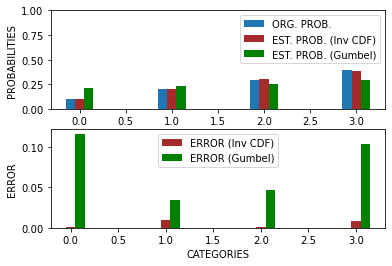

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
# Inverse CDF Method
def inverse_cdf(prob):
    u = np.random.uniform()
    cdf_of_z = np.cumsum(prob)
    # using generalized inverse, we need to find the minimum index j such that F(j) >= u for all u, for this we use numpy function "searchsorted"
    sample = np.searchsorted(cdf_of_z, u) # this yields the samples of Z
    return sample
# Gumbel-max trick
def gumbel_max(prob):
    log_p = np.log(prob)
    u = np.random.uniform(0.0, 1.0, len(log_p))
    G = -np.log(-np.log(u)) # use inverse Gumbel CDF to sample from Gumbel distribution given the uniform random variables
    I = np.argmax(prob + G)
    return I

def est_prob(samples, n_samples):
    return np.bincount(samples) / n_samples

prob = [0.1, 0.2, 0.3, 0.4] # the pk's for K = 4
n_samples = 5000
start_g = time()
samples_gumbel = [gumbel_max(prob) for _ in range(n_samples)] # generate samples using Gumbel
end_g = time() - start_g
print("--"*20)
print(f"Time taken by Gumbel-max: {end_g:0.4f} Sec")
start_cdf = time()
samples_invcdf = [inverse_cdf(prob) for _ in range(n_samples)] # generate samples using inverse CDF 
print(f"Time taken by inverse CDF: {time() - start_cdf:0.4f} Sec")
# we can compute the estimated probabilites from the samples of Z
est_prob_gumbel = est_prob(samples_gumbel, n_samples)
est_prob_invcdf =  est_prob(samples_invcdf, n_samples) # more number of samples (n_samples) will give better estimates
error_gumbel = abs(prob - est_prob_gumbel)
error_invcdf = abs(prob - est_prob_invcdf)

bar_width = 0.1
K = np.arange(len(prob)) # number of categories
fig, ax = plt.subplots(2,1)
ax[0].bar(K - bar_width, prob, bar_width, label="ORG. PROB.")
ax[0].bar(K, est_prob_invcdf, bar_width, color='brown', label="EST. PROB. (Inv CDF)")
ax[0].bar(K + bar_width, est_prob_gumbel, bar_width, color='green', label="EST. PROB. (Gumbel)")
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("PROBABILITIES")
ax[1].bar(K, error_invcdf , bar_width, color='brown', label="ERROR (Inv CDF)")
ax[1].bar(K + bar_width, error_gumbel, bar_width, color='green', label="ERROR (Gumbel)")
ax[1].set_xlabel("CATEGORIES")
ax[1].set_ylabel("ERROR")
ax[0].legend()
ax[1].legend()
print(f"Avg. error Gumbel-max: {np.sum(error_gumbel)/len(prob):0.4f}")
print(f"Avg. error inv CDF: {np.sum(error_invcdf)/len(prob):0.4f}")